In [1]:
# Importing libraries
import copy
import pandas as pd
import matplotlib.pyplot as plt

from cycles import calculate_two_evaporators_cycle

In [2]:
# Transformation functions for basic cycle optimization results
def basic_cycle_join_with_reference_refrigerant(df):
    distinct_r410a = \
        df[df['refrigerant'] == 'R410a'][[
            't_external_env',
            'default_cop',
            'default_exergy_efficiency'
        ]]\
            .groupby(by=['t_external_env'])\
            .mean()\
            .rename(columns={
                'default_cop': 'default_cop_r410a',
                'default_exergy_efficiency': 'default_exergy_efficiency_r410a'
            })\
            .reset_index()
    return df.merge(distinct_r410a, how='inner', on=['t_external_env'])

def basic_cycle_add_remaining_columns(df):
    df['cop_improvement'] = (df['cop'] / df['default_cop'] - 1) * 100
    df['exergy_efficiency_improvement'] = \
    (df['exergy_efficiency'] / df['default_exergy_efficiency'] - 1) * 100
    df['cop_improvement_r410a'] = (df['cop'] / df['default_cop_r410a'] - 1) * 100
    df['exergy_efficiency_improvement_r410a'] = \
    (df['exergy_efficiency'] / df['default_exergy_efficiency_r410a'] - 1) * 100
    return df

def basic_cycle_group_by_refrigerant(df):
    agg_map = {
        'subcooling': 'mean',
        'superheating': 'mean',
        'work': 'mean',
        'cop': 'mean',
        'cop_improvement': 'mean',
        'cop_improvement_r410a': 'mean',
        'exergy_efficiency': 'mean',
        'exergy_efficiency_improvement': 'mean',
        'exergy_efficiency_improvement_r410a': 'mean'
    }
    return df[[
        'refrigerant', 
        'subcooling', 
        'superheating', 
        'work',
        'cop',
        'cop_improvement',
        'cop_improvement_r410a',
        'exergy_efficiency',
        'exergy_efficiency_improvement',
        'exergy_efficiency_improvement_r410a'
    ]]\
        .groupby(by='refrigerant')\
        .agg(agg_map)\
        .sort_values(by='work', ascending=True)\
        .rename(columns={
            'subcooling': 'optimized_subcooling',
            'superheating': 'optimized_superheating',
            'work': 'avg_work',
            'cop_improvement': 'avg_cop_improvement',
            'cop_improvement_r410a': 'avg_cop_improvement_r410a',
            'exergy_efficiency_improvement': 'avg_exergy_efficiency_improvement',
            'exergy_efficiency_improvement_r410a': 'avg_exergy_efficiency_improvement_r410a'
        })\
        .reset_index()

def basic_cycle_transform_df(df_0):
    df_1 = basic_cycle_join_with_reference_refrigerant(df_0)
    df_2 = basic_cycle_add_remaining_columns(df_1)
    df_3 = basic_cycle_group_by_refrigerant(df_2)
    return df_3

In [3]:
# Importing basic cycle optimization results
basic_cop = pd.read_excel('./results/basic_cop.xlsx')
basic_exergy_efficiency = pd.read_excel('./results/basic_exergy_efficiency.xlsx')

In [4]:
# Transforming basic cycle with COP optimization results
result_basic_cop = basic_cycle_transform_df(basic_cop)
result_basic_cop

,refrigerant,optimized_subcooling,optimized_superheating,avg_work,cop,avg_cop_improvement,avg_cop_improvement_r410a,exergy_efficiency,avg_exergy_efficiency_improvement,avg_exergy_efficiency_improvement_r410a
0,R600a,10.0,10.0,219.936984,12.083042,8.963378,17.720877,0.277540,8.963378,17.720877
1,R1234ze(E),10.0,10.0,221.484545,12.000190,9.809497,16.905592,0.275594,9.809497,16.905592
2,R1234yf,10.0,10.0,223.216900,11.909199,11.762835,16.008279,0.273448,11.762835,16.008279
3,R134a,10.0,0.0,223.660341,11.883966,8.881807,15.770708,0.272912,8.881807,15.770708
4,R290,10.0,0.0,227.189060,11.699976,9.010726,13.975303,0.268671,9.010726,13.975303
5,NH3,10.0,0.0,227.318938,11.690325,4.284658,13.896476,0.268528,4.284658,13.896476
6,R22,10.0,0.0,227.834628,11.665857,7.456723,13.647861,0.267913,7.456723,13.647861
7,R410a,10.0,0.0,235.225814,11.302723,10.092917,10.092917,0.259483,10.092917,10.092917
8,R404a,10.0,0.0,237.509719,11.192289,12.548558,9.026089,0.256994,12.548558,9.026089


In [5]:
# Transforming basic cycle with exergy efficiency optimization results
result_basic_exergy_efficiency = basic_cycle_transform_df(basic_exergy_efficiency)
result_basic_exergy_efficiency

,refrigerant,optimized_subcooling,optimized_superheating,avg_work,cop,avg_cop_improvement,avg_cop_improvement_r410a,exergy_efficiency,avg_exergy_efficiency_improvement,avg_exergy_efficiency_improvement_r410a
0,R600a,10.0,10.0,219.936984,12.083042,8.963378,17.720877,0.277540,8.963378,17.720877
1,R1234ze(E),10.0,10.0,221.484545,12.000190,9.809497,16.905592,0.275594,9.809497,16.905592
2,R1234yf,10.0,10.0,223.216900,11.909199,11.762835,16.008279,0.273448,11.762835,16.008279
3,R134a,10.0,0.0,223.660341,11.883966,8.881807,15.770708,0.272912,8.881807,15.770708
4,R290,10.0,0.0,227.189060,11.699976,9.010726,13.975303,0.268671,9.010726,13.975303
5,NH3,10.0,0.0,227.318938,11.690325,4.284658,13.896476,0.268528,4.284658,13.896476
6,R22,10.0,0.0,227.834628,11.665857,7.456723,13.647861,0.267913,7.456723,13.647861
7,R410a,10.0,0.0,235.225814,11.302723,10.092917,10.092917,0.259483,10.092917,10.092917
8,R404a,10.0,0.0,237.509719,11.192289,12.548558,9.026089,0.256994,12.548558,9.026089


In [6]:
# Transformation functions for two evaporators cycle optimization results
def two_evaporators_cycle_join_with_reference_refrigerant(df):
    distinct_r600a = \
        df[df['refrigerant'] == 'R600a'][[
            't_external_env',
            'default_cop',
            'default_exergy_efficiency'
        ]]\
            .groupby(by=['t_external_env'])\
            .mean()\
            .rename(columns={
                'default_cop': 'default_cop_r600a',
                'default_exergy_efficiency': 'default_exergy_efficiency_r600a'
            })\
            .reset_index()
    return df.merge(distinct_r600a, how='inner', on=['t_external_env'])

def two_evaporators_cycle_add_remaining_columns(df):
    df['cop_improvement'] = (df['cop'] / df['default_cop'] - 1) * 100
    df['exergy_efficiency_improvement'] = \
    (df['exergy_efficiency'] / df['default_exergy_efficiency'] - 1) * 100
    df['cop_improvement_r600a'] = (df['cop'] / df['default_cop_r600a'] - 1) * 100
    df['exergy_efficiency_improvement_r600a'] = \
    (df['exergy_efficiency'] / df['default_exergy_efficiency_r600a'] - 1) * 100
    return df

def two_evaporators_cycle_group_by_refrigerant(df, sort):
    agg_map = {
        'subcooling': 'mean',
        'superheating_ht': 'mean',
        'superheating_lt': 'mean',
        'work': 'mean',
        'cop': 'mean',
        'cop_improvement': 'mean',
        'cop_improvement_r600a': 'mean',
        'exergy_efficiency': 'mean',
        'exergy_efficiency_improvement': 'mean',
        'exergy_efficiency_improvement_r600a': 'mean'
    }
    return df[[
        'refrigerant', 
        'subcooling', 
        'superheating_ht', 
        'superheating_lt', 
        'work',
        'cop',
        'cop_improvement',
        'cop_improvement_r600a',
        'exergy_efficiency',
        'exergy_efficiency_improvement',
        'exergy_efficiency_improvement_r600a'
    ]]\
        .groupby(by='refrigerant')\
        .agg(agg_map)\
        .sort_values(by=sort[0], ascending=sort[1])\
        .rename(columns={
            'subcooling': 'optimized_subcooling',
            'superheating': 'optimized_superheating',
            'work': 'avg_work',
            'cop_improvement': 'avg_cop_improvement',
            'cop_improvement_r600a': 'avg_cop_improvement_r600a',
            'exergy_efficiency_improvement': 'avg_exergy_efficiency_improvement',
            'exergy_efficiency_improvement_r600a': 'avg_exergy_efficiency_improvement_r600a'
        })\
        .reset_index()

def two_evaporators_cycle_transform_df(df_0, sort):
    df_1 = two_evaporators_cycle_join_with_reference_refrigerant(df_0)
    df_2 = two_evaporators_cycle_add_remaining_columns(df_1)
    df_3 = two_evaporators_cycle_group_by_refrigerant(df_2, sort)
    return df_3

In [7]:
# Importing two evaporators cycle optimization results
two_evaporators_cop = pd.read_excel('./results/two_evaporators_cop.xlsx')
two_evaporators_exergy_efficiency = pd.read_excel('./results/two_evaporators_exergy_efficiency.xlsx')

In [8]:
# Transforming two evaporators cycle with COP optimization results
result_two_evaporators_cop = two_evaporators_cycle_transform_df(two_evaporators_cop, ['work', True])
result_two_evaporators_cop

,refrigerant,optimized_subcooling,superheating_ht,superheating_lt,avg_work,cop,avg_cop_improvement,avg_cop_improvement_r600a,exergy_efficiency,avg_exergy_efficiency_improvement,avg_exergy_efficiency_improvement_r600a
0,R600a,10.0,10.0,10.0,54.144133,2.775593,10.608017,10.608017,0.365395,10.471087,10.471087
1,R1234ze(E),10.0,10.0,10.0,55.284748,2.718653,11.871240,8.332181,0.357841,11.719660,8.188312
2,R134a,10.0,10.0,10.0,55.677140,2.699343,10.191001,7.565808,0.354664,10.120023,7.227279
3,R290,10.0,10.0,10.0,56.119618,2.678133,10.416138,6.719118,0.351804,10.345966,6.362962
4,R22,10.0,0.0,0.0,56.270959,2.670712,7.853771,6.427930,0.350048,7.830288,5.831178
5,R1234yf,10.0,10.0,10.0,56.447759,2.663133,14.581344,6.109984,0.350609,14.421298,6.003281
6,NH3,10.0,0.0,0.0,57.355884,2.619741,4.375581,4.406491,0.342837,4.370449,3.649541
7,R410a,10.0,0.0,0.0,58.703501,2.560762,10.432957,2.031838,0.335192,10.414368,1.341873
8,R404a,10.0,10.0,10.0,59.520713,2.525933,15.180255,0.637714,0.331768,15.110036,0.307816


In [9]:
# Transforming two evaporators cycle with exergy efficiency optimization results
result_two_evaporators_exergy_efficiency = \
    two_evaporators_cycle_transform_df(two_evaporators_exergy_efficiency, ['exergy_efficiency', False])
result_two_evaporators_exergy_efficiency

,refrigerant,optimized_subcooling,superheating_ht,superheating_lt,avg_work,cop,avg_cop_improvement,avg_cop_improvement_r600a,exergy_efficiency,avg_exergy_efficiency_improvement,avg_exergy_efficiency_improvement_r600a
0,R600a,10.0,10.0,0.0,54.483817,2.758388,9.920289,9.920289,0.366945,10.940253,10.940253
1,R1234ze(E),10.0,10.0,0.0,55.642440,2.701287,11.154217,7.637931,0.359447,12.221488,8.674430
2,R134a,10.0,10.0,0.0,55.798255,2.693571,9.953506,7.334005,0.357105,10.878455,7.965843
3,R290,10.0,10.0,0.0,56.268296,2.671150,10.126175,6.438925,0.354075,11.058658,7.050028
4,R1234yf,10.0,10.0,0.0,57.002180,2.637384,13.469908,5.081056,0.351506,14.714278,6.275222
5,R22,10.0,10.0,0.0,56.533249,2.658265,7.352294,5.933108,0.350559,7.987783,5.985757
6,NH3,10.0,0.0,0.0,57.355884,2.619741,4.375581,4.406491,0.342837,4.370449,3.649541
7,R410a,10.0,10.0,0.0,58.961435,2.549467,9.947988,1.583621,0.336021,10.687546,1.592542
8,R404a,10.0,10.0,0.0,59.892051,2.510425,14.469249,0.016966,0.333314,15.646528,0.776011


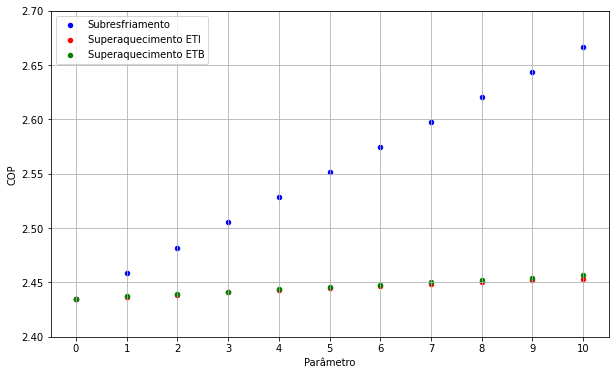

In [16]:
def generate_df(parameter):
    input_values = {
        't_external_env': 28 + 273.15,
        't_internal_env_ht': 3 + 273.15,
        't_internal_env_lt': -18 + 273.15,
        'approach_condenser': 5,
        'approach_evaporator_ht': 5,
        'approach_evaporator_lt': 5,
        'q_evaporator_ht': 75,
        'q_evaporator_lt': 75,
        'isentropic_efficiency': 0.7,
        'subcooling': 0,
        'superheating_ht': 0,
        'superheating_lt': 0,
        'refrigerant': 'R600a'
    }

    input_ranges = {
        parameter: range(0,11)
    }

    original_input_values = copy.copy(input_values)
    results = pd.DataFrame(columns=[
        'cop',
        parameter
    ])
    for i in input_ranges[parameter]:
        input_values = copy.copy(original_input_values)
        input_values[parameter] = i
        cycle = calculate_two_evaporators_cycle(input_values)
        results = results.append({
            'cop': cycle['cop'],
            parameter: i
        }, ignore_index=True)
    return results

results_subcooling = generate_df('subcooling')
results_superheating_ht = generate_df('superheating_ht')
results_superheating_lt = generate_df('superheating_lt')

fig, ax = plt.subplots(figsize=(10, 6))
results_subcooling.plot(
    x='subcooling', 
    y='cop', 
    kind='scatter',
    label='Subresfriamento',
    color='blue',
    ax=ax
)
results_superheating_ht.plot(
    x='superheating_ht', 
    y='cop', 
    kind='scatter',
    label='Superaquecimento ETI',
    color='red',
    ax=ax
)
results_superheating_lt.plot(
    x='superheating_lt', 
    y='cop', 
    kind='scatter',
    label='Superaquecimento ETB',
    color='green',
    ax=ax
)
ax.set_ylabel('COP')
ax.set_xlabel('Parâmetro')
ax.set_xticks(range(0,11))
ax.set_yticks([2 + (x * 0.05) for x in range(8, 15)])
ax.grid(True)

plt.savefig('images/comparison_of_parameters_effect_on_cop.png')